In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Boston House Pricing Dataset 

In [2]:
df = pd.read_csv('HousingData.csv')   

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Sumarizing the stats of the Data

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Chek the missing values

In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df["CRIM"].fillna(df["CRIM"].mean(), inplace=True) # fill CRIM with mean value
df["ZN"].fillna(0, inplace=True) # fill ZN with mode value, because 360 of the entries are 0
df["INDUS"].fillna(df["INDUS"].mean(), inplace=True) # fill INDUS with mean value
df["CHAS"].fillna(0, inplace=True) # fill CHAS with mode value, because 452 of the entries are 0
df["AGE"].fillna(df["AGE"].mean(), inplace=True) # fill AGE with mean value
df["LSTAT"].fillna(df["LSTAT"].mean(), inplace=True) 

In [8]:
outliers = df.quantile(.97) # dealing with the outliers seen in the boxplots above
df = df[(df['CRIM']<outliers['CRIM'])]
df = df[(df['ZN']<outliers['ZN'])]
df = df[(df['RM']<outliers['RM'])]
df = df[(df['DIS']<outliers['DIS'])]
df = df[(df['PTRATIO']<outliers['PTRATIO'])]
df = df[(df['B']<outliers['B'])]
df = df[(df['LSTAT']<outliers['LSTAT'])]

## Exploratory data analysis
### Correlation

In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.234246,0.537164,-0.038638,0.548214,-0.157272,0.433803,-0.486592,0.820123,0.776575,0.375207,-0.533073,0.496826,-0.360421
ZN,-0.234246,1.000000,-0.448000,-0.023307,-0.418805,0.278924,-0.455012,0.562668,-0.257135,-0.285738,-0.369933,0.183273,-0.370407,0.288001
INDUS,0.537164,-0.448000,1.000000,0.043880,0.686054,-0.320043,0.542334,-0.657479,0.590287,0.683309,0.287171,-0.403916,0.496806,-0.368039
CHAS,-0.038638,-0.023307,0.043880,1.000000,0.060876,0.106112,0.079657,-0.093458,0.006326,-0.034174,-0.080775,0.075489,-0.057151,0.227926
NOX,0.548214,-0.418805,0.686054,0.060876,1.000000,-0.245082,0.654333,-0.747513,0.564604,0.617146,0.066624,-0.431466,0.514310,-0.331190
RM,-0.157272,0.278924,-0.320043,0.106112,-0.245082,1.000000,-0.181893,0.162201,-0.113841,-0.198016,-0.267953,0.086218,-0.455396,0.547155
AGE,0.433803,-0.455012,0.542334,0.079657,0.654333,-0.181893,1.000000,-0.698226,0.396135,0.436997,0.182863,-0.277037,0.545286,-0.301971
DIS,-0.486592,0.562668,-0.657479,-0.093458,-0.747513,0.162201,-0.698226,1.000000,-0.467074,-0.518076,-0.144482,0.340581,-0.439162,0.138795
RAD,0.820123,-0.257135,0.590287,0.006326,0.564604,-0.113841,0.396135,-0.467074,1.000000,0.922831,0.489691,-0.475606,0.407919,-0.280554
TAX,0.776575,-0.285738,0.683309,-0.034174,0.617146,-0.198016,0.436997,-0.518076,0.922831,1.000000,0.442286,-0.480139,0.445883,-0.359319


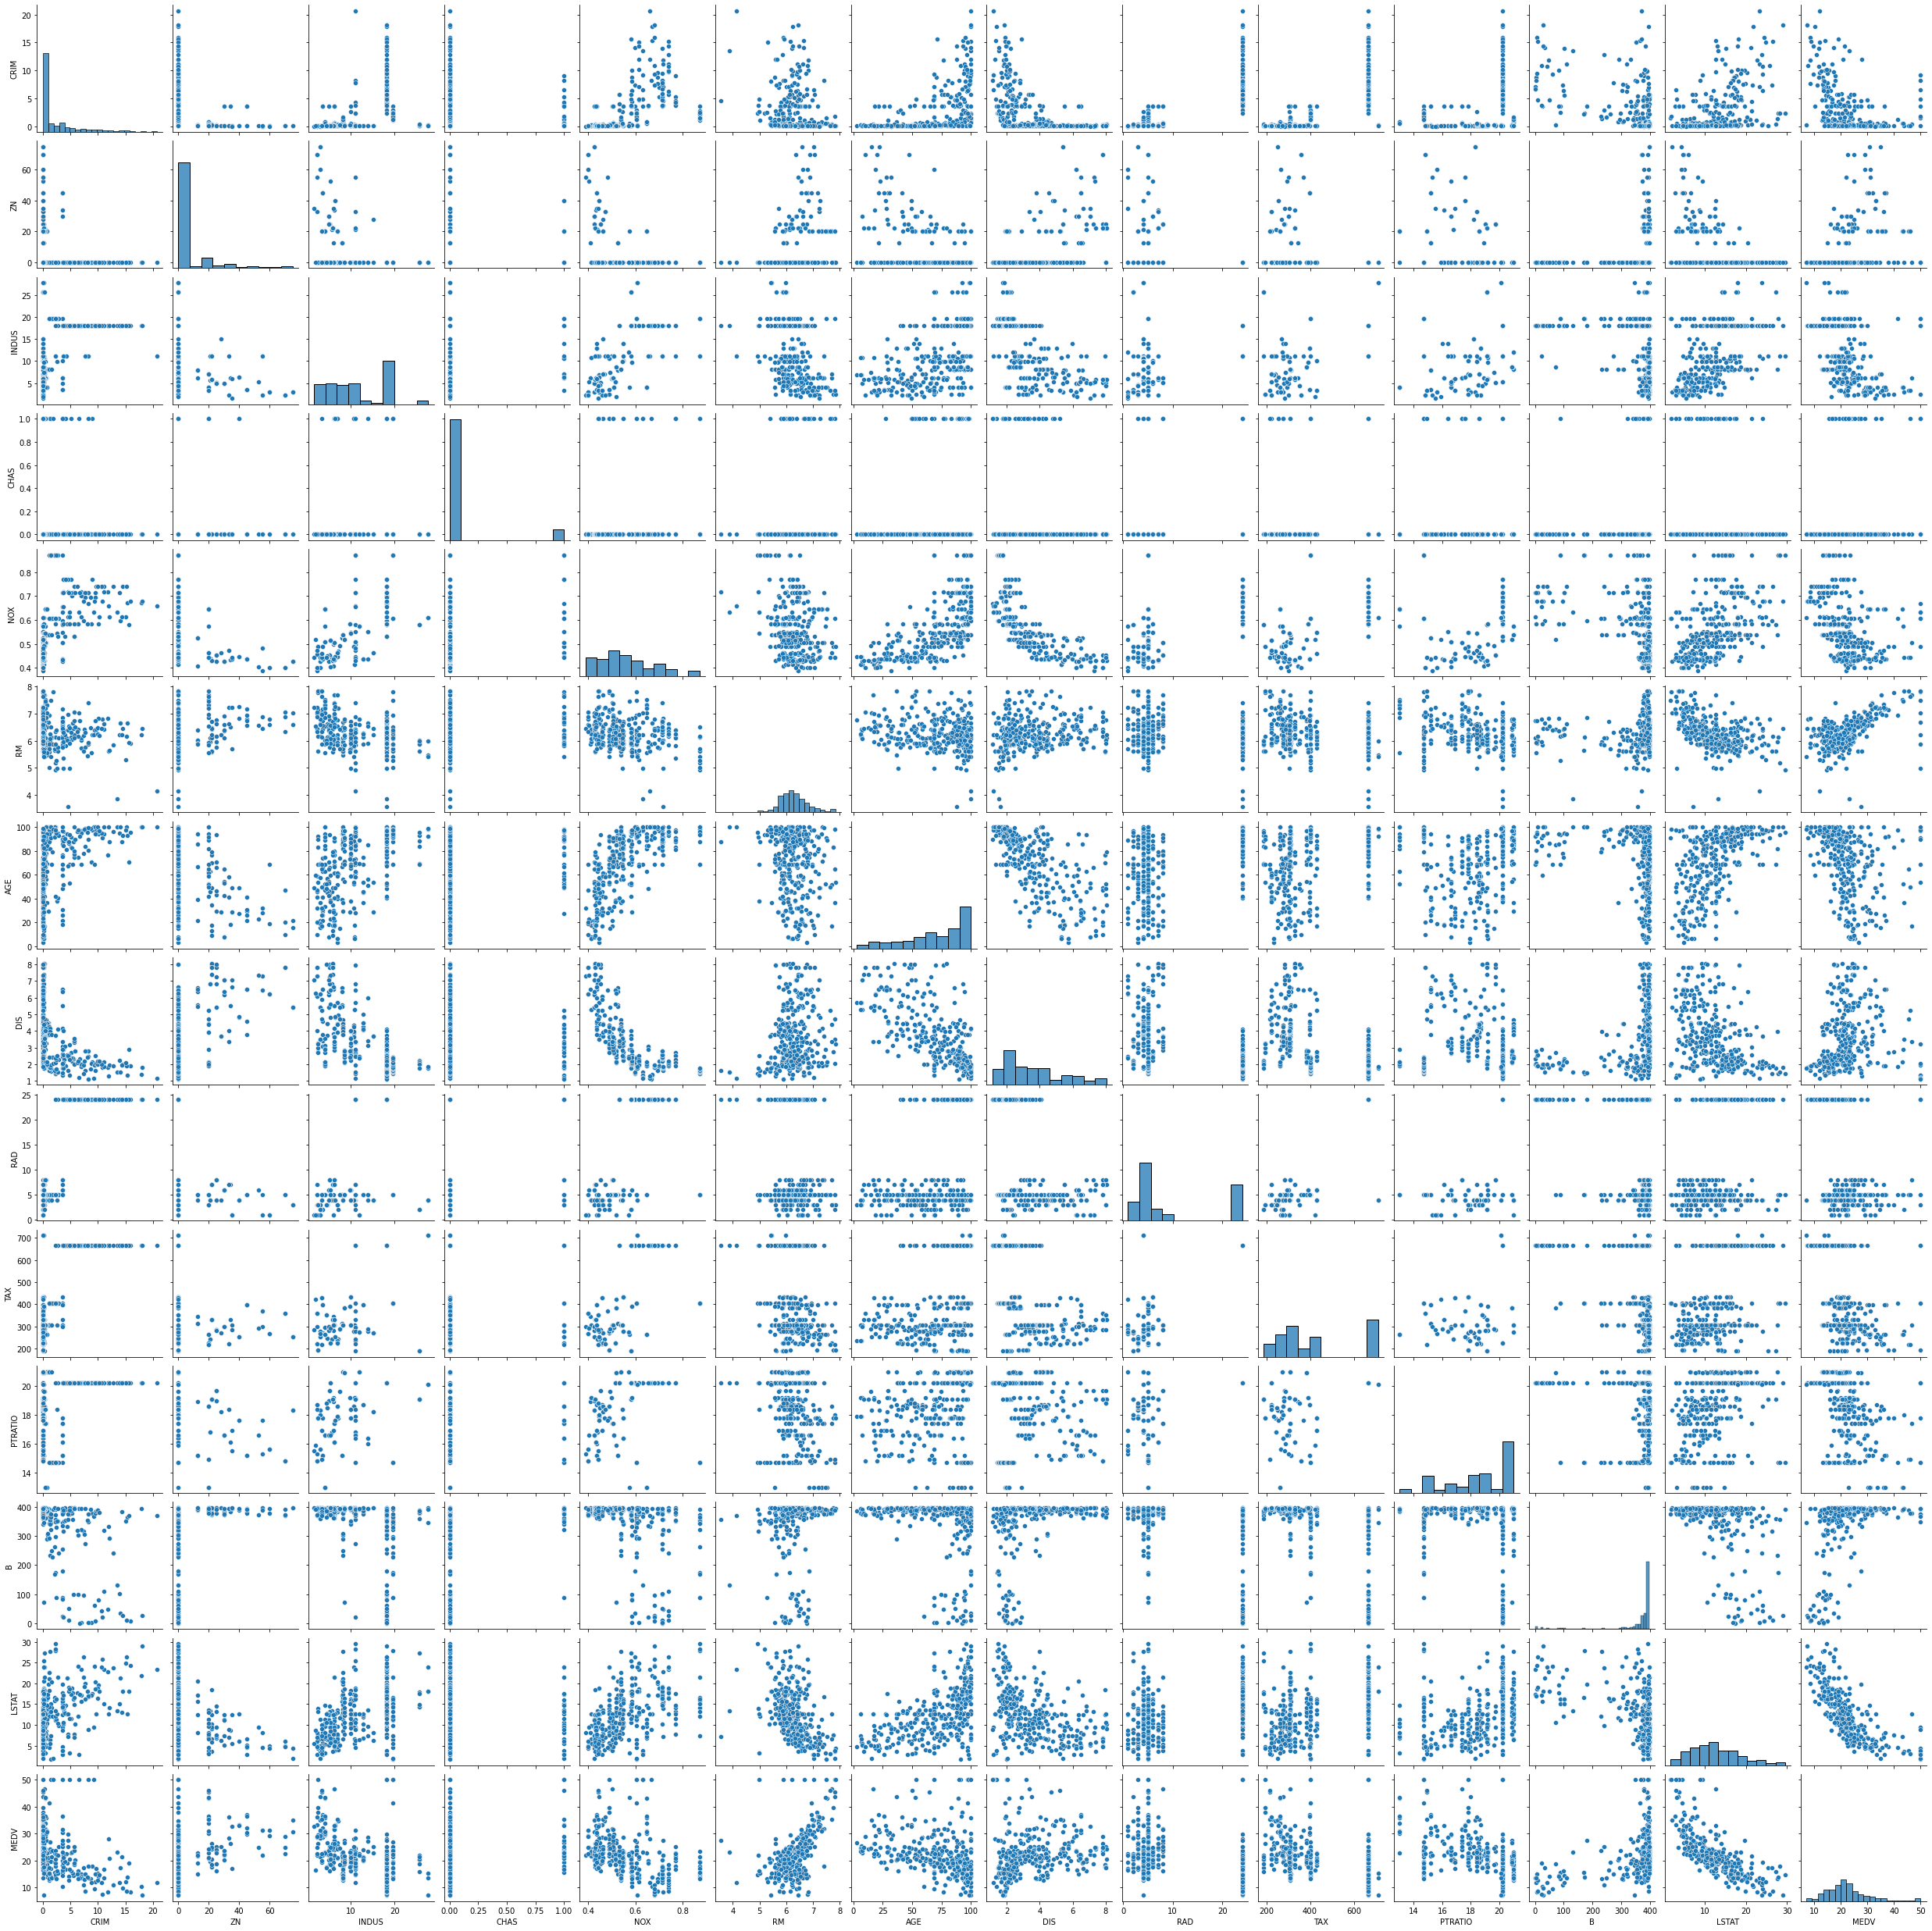

In [10]:
sns.pairplot(df)

Text(0, 0.5, 'Price')

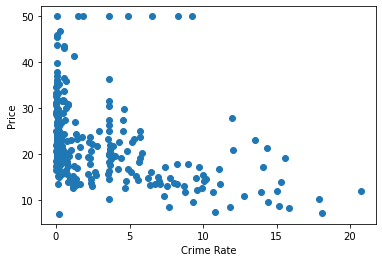

In [11]:
plt.scatter(x=df['CRIM'],y=df['MEDV'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

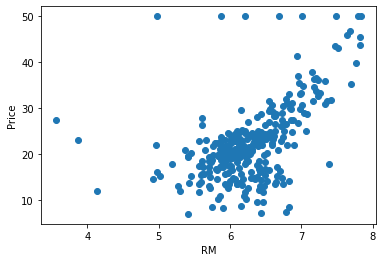

In [12]:
plt.scatter(x=df['RM'],y=df['MEDV'])
plt.xlabel('RM')
plt.ylabel('Price')

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

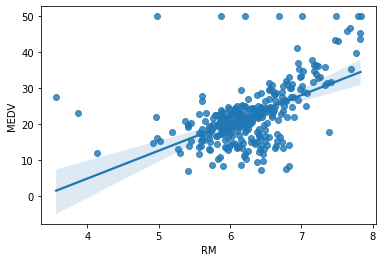

In [13]:
sns.regplot(x=df['RM'],y=df['MEDV'])

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

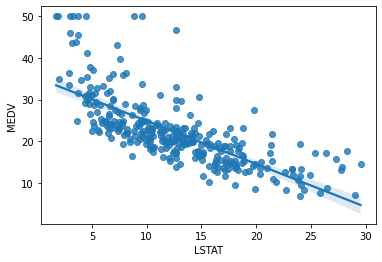

In [14]:
sns.regplot(x=df['LSTAT'],y=df['MEDV'])

<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

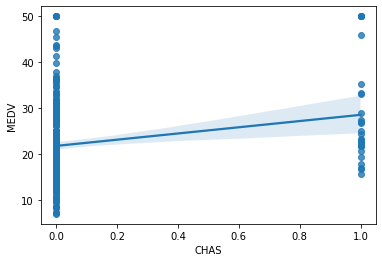

In [15]:
sns.regplot(x=df['CHAS'],y=df['MEDV'])

## Missing Value Treatment
We are filling missing values with mean or mode values of each missing column.



In [16]:
## independenct and Dependent Featires
X = df.drop('MEDV',axis=1)
y = df['MEDV']

## Train and Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
315,0.25356,0.0,9.90,0.0,0.5440,5.705,77.700000,3.9450,4,304,18.4,396.42,11.500000
116,0.13158,0.0,10.01,0.0,0.5470,6.176,72.500000,2.7301,6,432,17.8,393.30,12.715432
221,0.40771,0.0,6.20,1.0,0.5070,6.164,91.300000,3.0480,8,307,17.4,395.24,21.460000
60,0.14932,25.0,5.13,0.0,0.4530,5.741,66.200000,7.2254,8,284,19.7,395.11,13.150000
342,0.02498,0.0,1.89,0.0,0.5180,6.540,59.700000,6.2669,1,422,15.9,389.96,8.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.03705,20.0,3.33,0.0,0.4429,6.968,68.518519,5.2447,5,216,14.9,392.23,4.590000
105,0.13262,0.0,8.56,0.0,0.5200,5.851,96.700000,2.1069,5,384,20.9,394.05,16.470000
159,1.42502,0.0,19.58,0.0,0.8710,6.510,100.000000,1.7659,5,403,14.7,364.31,7.390000
434,13.91340,0.0,18.10,0.0,0.7130,6.208,95.000000,2.2222,24,666,20.2,100.63,15.170000


In [20]:
## Standardize the data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
print(model.coef_)

[-1.07092394  0.6473183  -0.48833255  1.19369843 -1.75934424  1.54572408
 -0.32287269 -3.94126508  4.29375661 -2.69213997 -1.44091139  1.21695932
 -4.36202893]


In [26]:
print(model.intercept_)

22.745535714285715


In [27]:
## on which Parameter the model has been trained 
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

## Predicting with test Data

In [28]:
reg_predict = model.predict(X_test)

In [29]:
reg_predict

array([35.75038932, 30.570633  , 27.42248069, 22.60772227, 32.7845636 ,
       32.85251865, 21.87886746, 26.79895724, 21.94021311, 21.5433421 ,
       26.37122433, 21.68709211, 10.20114855, 21.38552961, 36.59303765,
       22.4585945 , 25.32597989, 20.45252695, 13.40880712, 13.82432772,
       26.41879581, 28.34028623, 20.32546789, 10.12869734, 24.19011007,
       24.73878155, 23.87825589, 26.53142279, 27.69811289,  4.65638305,
       36.2905807 , 24.42442305, 29.43928696, 21.00555598, 17.34099128,
       36.455657  , 17.95369012, 24.86462589, 28.23880696, 14.24361778,
       14.80976463, 20.88269715, 12.15816746, 10.88881047, 25.53719243,
       17.21313346, 24.48422927,  6.34802786, 14.73981587, 19.86625846,
       14.45295199, 19.61919559, 29.09585452, 21.74468765, 13.39262639,
       15.46673009, 23.75642443, 21.17300884, 11.91005111, 22.83544675,
       22.34145427, 28.38380862, 12.60414571, 11.75534439, 28.35650105,
       39.96921454, 12.60997634,  5.00675561, 33.54632434, 23.65

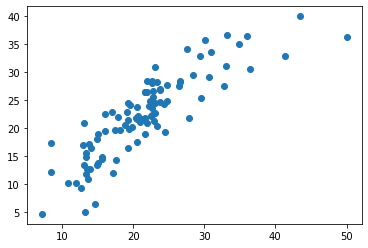

In [30]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_predict)

In [31]:
resuduals = y_test-reg_predict

In [32]:
resuduals

259   -5.650389
192    5.829367
302   -1.022481
16     0.492278
157    8.515436
         ...   
452   -3.402328
395   -7.711860
86     0.330610
247    3.077020
219   -7.955985
Name: MEDV, Length: 97, dtype: float64

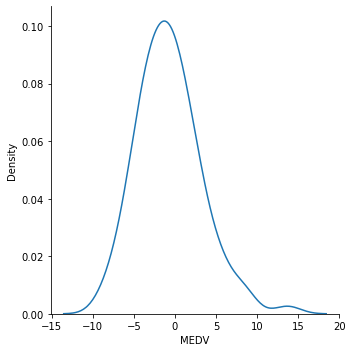

In [33]:
## ploting the residuals
sns.displot(resuduals,kind='kde')

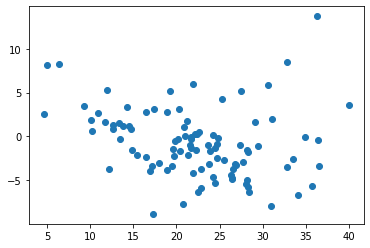

In [34]:
## scater plot with trespect o predictions and residuls
plt.scatter(reg_predict,resuduals)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
print(mean_absolute_error(y_test,reg_predict))
print(mean_squared_error(y_test,reg_predict))
print(np.sqrt(mean_squared_error(y_test,reg_predict)))

3.1065057818987794
15.668805787150381
3.95838423945306


In [37]:
model.score(X_test,y_test)

0.7208955389846634

In [38]:
import pickle

In [39]:
pickle.dump(model,open('regmodel.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))